In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from cuml.ensemble import RandomForestClassifier as cuRFClassifier
from time import time

Scikit-learn time 23.8189s
cuML time: 0.4705s
cuML speedup: 50.62x


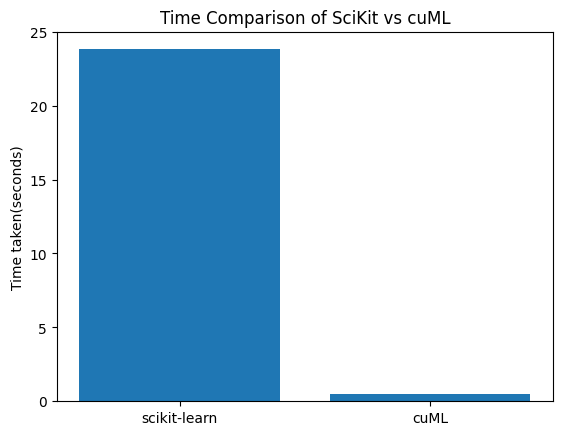

In [10]:
# randomly generated Dataset and convert to float32 to fit pickling
X = np.random.rand(10000, 1000)
y = np.random.randint(0, 2, 10000)

X = X.astype('float32')

# scikit-learn RandomForest + timing
clf_sk = RandomForestClassifier(n_estimators=100)
start_time = time()
clf_sk.fit(X, y)
sk_time = time() - start_time

# cuML RandomForest + timing
clf_cuml = cuRFClassifier(n_estimators=100)
start_time = time()
clf_cuml.fit(X, y)
cuml_time = time() - start_time

#print results
print("Scikit-learn time {:.4f}s".format(sk_time))
print("cuML time: {:.4f}s".format(cuml_time))
print("cuML speedup: {:.2f}x".format(sk_time/cuml_time))

#plot results
labels = ['scikit-learn', 'cuML']
values = [sk_time, cuml_time]

plt.bar(labels,values)
plt.ylabel('Time taken(seconds)')
plt.title('Time Comparison of SciKit vs cuML')

plt.show()